# Import Statements

In [132]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
import numpy as np # Imported for calculations
from sklearn.feature_extraction.text import TfidfVectorizer # Imported to convert raw documents into a matrix of tf idf features
from sklearn.linear_model import LogisticRegression # Imported to enable the use of logistic regression to classify text
from sklearn.model_selection import train_test_split # Imported to enable the user to split the data into train, test samples
from sklearn.metrics import classification_report, accuracy_score # Imported to calculate the accuracy and also print the classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for report generation


# imports for word cloud
from collections import Counter
from wordcloud import WordCloud


# Importing the dataset

In [61]:
df = pd.read_csv('malayalam_train.tsv', sep='\t')
print(df)

                                                   text         category
0                hoo mammokka police vesham aaha anthas        Positive 
1        Oru rekshayum illa...kidilam kannu nananjupoyi        Positive 
2                             Ikka     waiting.........        Positive 
3                Raju Ettante Oro Shorttum Ijathi ppwli        Positive 
4      Ettan fansil netti poya aarenkilum undo?    #...        Positive 
...                                                 ...              ...
4846   Madhuraraja trailer Kand ivide vannanvar likkeee   unknown_state 
4847   Njn pru lalettan fan ahn..  eee trailer mass ...        Positive 
4848   Valiya pratheesha illa nalla entertainment  a...  Mixed_feelings 
4849   Dislike adikkunna kazhuthakalude mukhath adik...        Negative 
4850   Adipoli..... Pakshe oru sankadam ithinte thir...  Mixed_feelings 

[4851 rows x 2 columns]


# Preprocess the data (Add Later)

# Exploring the dataset

In [62]:
print(df.shape)
df.head()

(4851, 2)


,text,category
0,hoo mammokka police vesham aaha anthas,Positive
1,Oru rekshayum illa...kidilam kannu nananjupoyi,Positive
2,Ikka waiting.........,Positive
3,Raju Ettante Oro Shorttum Ijathi ppwli,Positive
4,Ettan fansil netti poya aarenkilum undo? #...,Positive


In [65]:
# Renaming the classes

# Removing any leading/trailing spaces
df['category'] = df['category'].str.strip()

# Replacing 'unknown_state' with 'Irrelevant'
df['category'] = df['category'].replace({'unknown_state': 'Neutral'})
df['category'] = df['category'].replace({'not-malayalam': 'Not-Malayalam'})

# Viewing the number of items in each class after replacement
print(df['category'].value_counts())  # Used to view the number of items in each class.

## There is a significant imbalance in the classes in this dataset

Positive          2022
Neutral           1344
Not-Malayalam      647
Negative           549
Mixed_feelings     289
Name: category, dtype: int64


# Visualising the data

In [87]:

# Calculate sentence length in terms of words and characters
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Summary statistics for sentence lengths
sentence_length_stats = df[['word_count', 'char_count']].describe()

print(sentence_length_stats)

        word_count   char_count
count  4851.000000  4851.000000
mean      8.120594    59.583385
std       3.115656    27.099226
min       1.000000     4.000000
25%       6.000000    41.000000
50%       7.000000    54.000000
75%       9.000000    71.500000
max      24.000000   186.000000


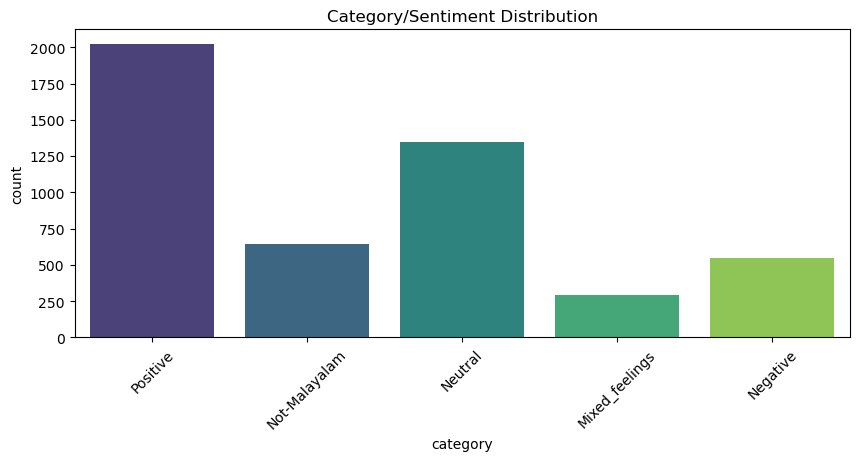

In [88]:
# Category distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='category', palette="viridis")
plt.title('Category/Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

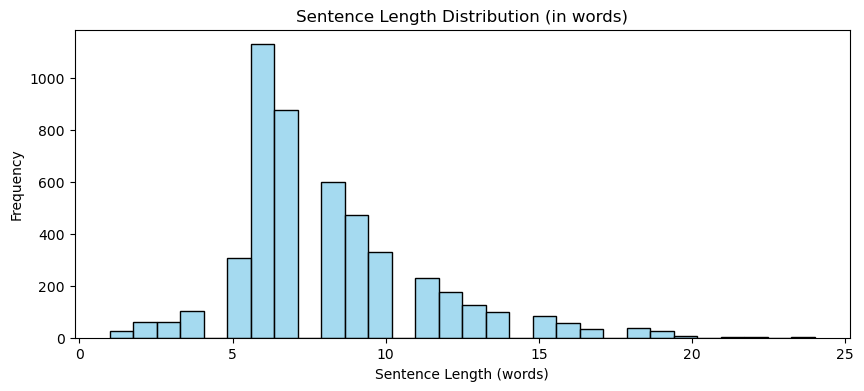

In [89]:
# Sentence length distribution in words
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='word_count', bins=30, color='skyblue')
plt.title('Sentence Length Distribution (in words)')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')
plt.show()

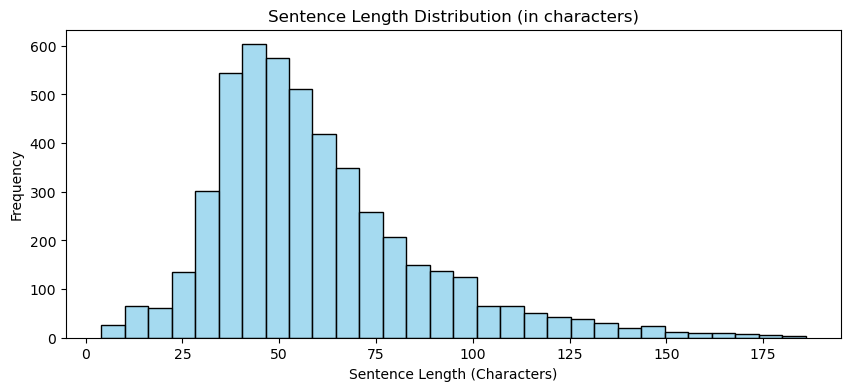

In [90]:
# Sentence length distribution in characters
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='char_count', bins=30, color='skyblue')
plt.title('Sentence Length Distribution (in characters)')
plt.xlabel('Sentence Length (Characters)')
plt.ylabel('Frequency')
plt.show()

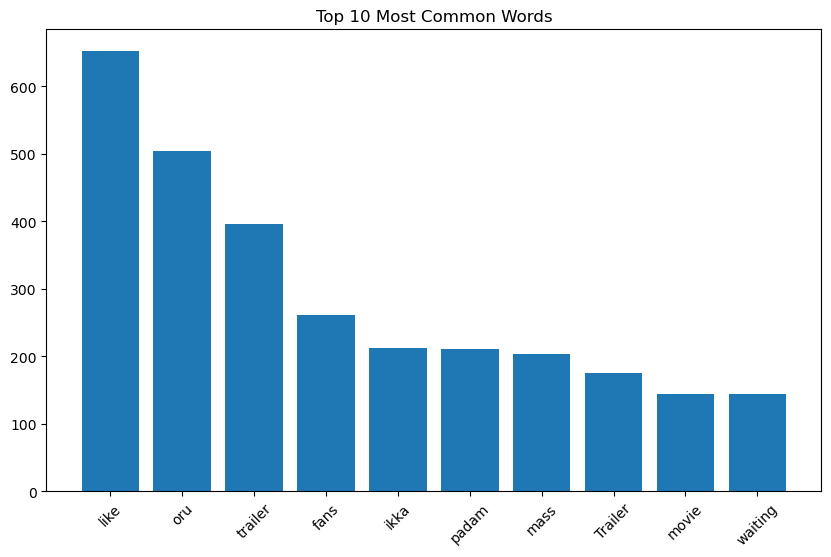

In [94]:
# Word Frequency Analysis
all_words = ' '.join(df['text']).split()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(10)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

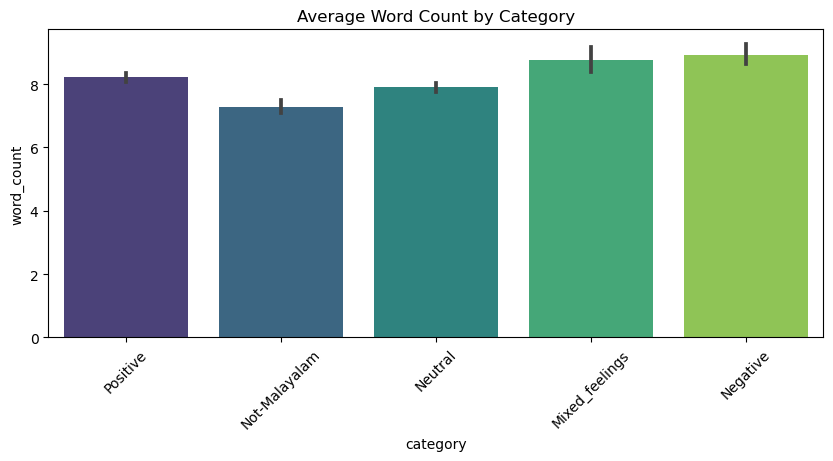

In [107]:
# Category-wise Word Counts

plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='word_count', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Word Count by Category')
plt.xticks(rotation=45)
plt.show()

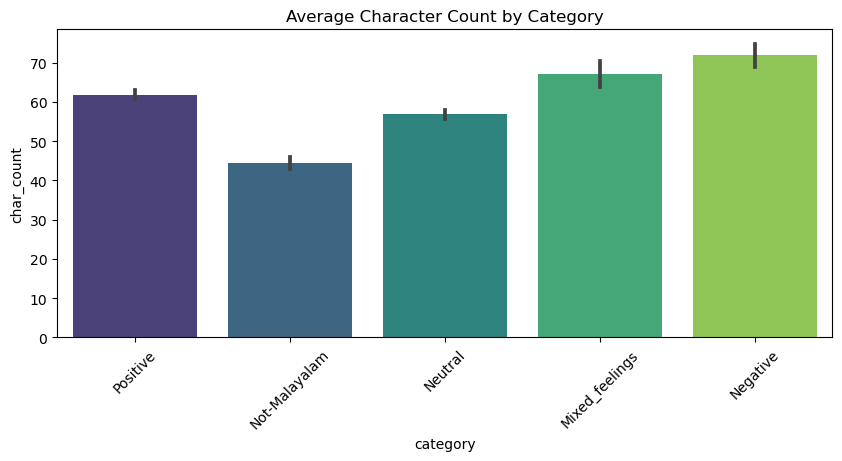

In [108]:
#  Category-wise Character Counts

plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='char_count', data=df, estimator=np.mean,palette='viridis')
plt.title('Average Character Count by Category')
plt.xticks(rotation=45)
plt.show()

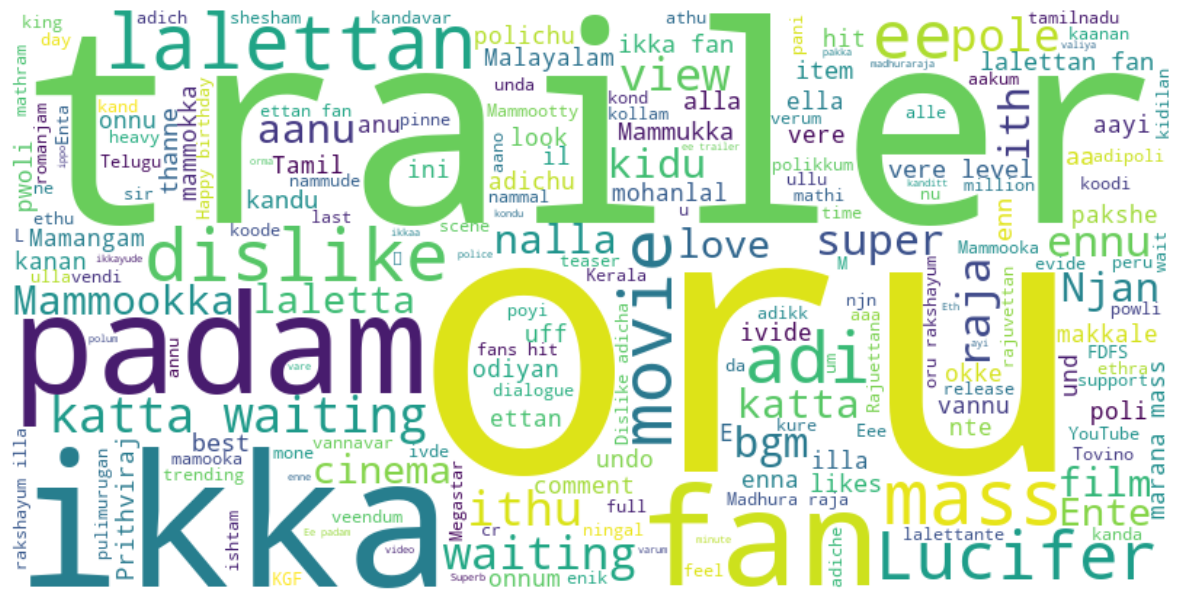

In [109]:
# Word Cloud

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(all_words))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

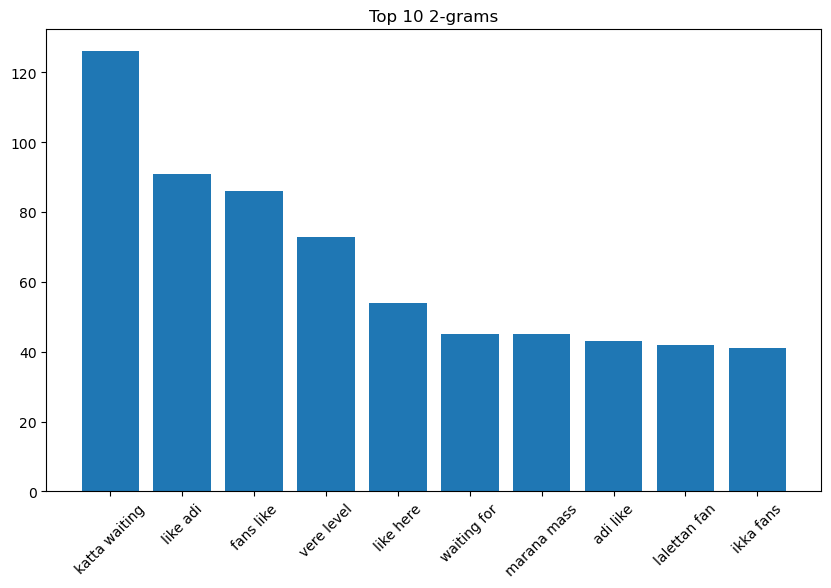

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngram_distribution(texts, n=None):
    """Plot the distribution of n-grams."""
    vect = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vect.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:10]
    
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*top_n_words))
    plt.title(f'Top 10 {n}-grams')
    plt.xticks(rotation=45)
    plt.show()

# Example usage for bigrams
plot_ngram_distribution(df['text'], n=2)


[nltk_data] Downloading package punkt to /Users/sachin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sachin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


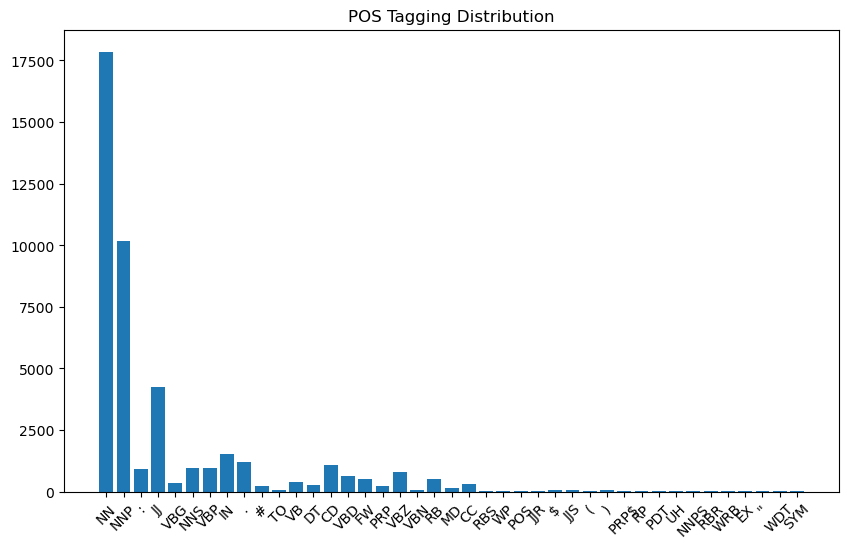

In [112]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# POS Tagging
words = nltk.word_tokenize(' '.join(df['text']))
pos_tags = nltk.pos_tag(words)
pos_counts = Counter(tag for word, tag in pos_tags)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('POS Tagging Distribution')
plt.xticks(rotation=45)
plt.show()


### Next we would need to map these classes into numbers for the machine learning model

In [122]:
df['label_num'] = df.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df.head

<bound method NDFrame.head of                                                    text        category  \
0                hoo mammokka police vesham aaha anthas        Positive   
1        Oru rekshayum illa...kidilam kannu nananjupoyi        Positive   
2                             Ikka     waiting.........        Positive   
3                Raju Ettante Oro Shorttum Ijathi ppwli        Positive   
4      Ettan fansil netti poya aarenkilum undo?    #...        Positive   
...                                                 ...             ...   
4846   Madhuraraja trailer Kand ivide vannanvar likkeee         Neutral   
4847   Njn pru lalettan fan ahn..  eee trailer mass ...        Positive   
4848   Valiya pratheesha illa nalla entertainment  a...  Mixed_feelings   
4849   Dislike adikkunna kazhuthakalude mukhath adik...        Negative   
4850   Adipoli..... Pakshe oru sankadam ithinte thir...  Mixed_feelings   

      word_count  char_count  label_num  
0              6          3

# Preparing the Training, and Test Dataset

In [140]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df.category,
    test_size=10, # 10 % of samples will be present in test dataset 
    random_state=42)

# print(X_train,y_train)

# Vectorization using TF-IDF
v = TfidfVectorizer()   
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

# print(X_test_tfidf)
print(X_train_tfidf)

  (0, 5786)	0.37583807072995246
  (0, 11558)	0.26457817588116933
  (0, 1631)	0.37583807072995246
  (0, 5981)	0.37583807072995246
  (0, 12448)	0.37583807072995246
  (0, 3915)	0.37583807072995246
  (0, 8175)	0.3222849034335424
  (0, 11329)	0.3462073841155924
  (1, 2727)	0.2815173507605822
  (1, 10778)	0.2361147432750343
  (1, 11313)	0.42884480135174274
  (1, 8700)	0.30971428967093484
  (1, 7283)	0.40906740481548937
  (1, 4911)	0.42884480135174274
  (1, 11862)	0.3141516256961664
  (1, 1600)	0.3677387049246802
  (2, 7965)	0.4074928436152343
  (2, 6226)	0.39140740716051015
  (2, 9508)	0.4403583084898383
  (2, 5631)	0.43016399296944
  (2, 5041)	0.32844768755888853
  (2, 9712)	0.4403583084898383
  (3, 4286)	0.4905780580815087
  (3, 4496)	0.5142962929553907
  (3, 15)	0.4145747266751993
  :	:
  (4837, 12347)	0.3108282679287836
  (4838, 10798)	0.2772543216828694
  (4838, 304)	0.2772543216828694
  (4838, 268)	0.2772543216828694
  (4838, 2032)	0.2772543216828694
  (4838, 10105)	0.2772543216828694


# NEED TO IMPORT TEST DATASET AND NOT SPLIT THE TRAINING DATASET

In [ ]:
AHKSDASKD

# Implementing the Logistic Regression Model

In [141]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Predictions and evaluation
predictions = log_reg.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8
                precision    recall  f1-score   support

Mixed_feelings       1.00      1.00      1.00         1
       Neutral       0.33      1.00      0.50         1
 Not-Malayalam       1.00      0.67      0.80         3
      Positive       1.00      0.80      0.89         5

      accuracy                           0.80        10
     macro avg       0.83      0.87      0.80        10
  weighted avg       0.93      0.80      0.83        10



/Users/sachin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       1.00      1.00      1.00         1
       Neutral       0.33      1.00      0.50         1
 Not-Malayalam       1.00      0.67      0.80         3
      Positive       1.00      0.80      0.89         5

      accuracy                           0.80        10
     macro avg       0.83      0.87      0.80        10
  weighted avg       0.93      0.80      0.83        10



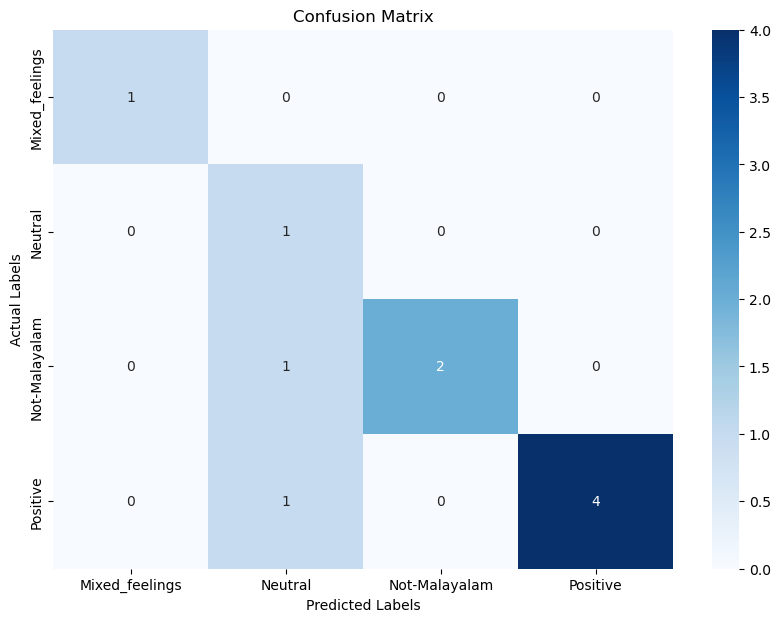

In [134]:
# Assuming predictions have been made as shown earlier
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = np.unique(y_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()